# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [4]:
iris_data = pd.read_csv("Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [31]:
model_summary = pd.DataFrame(columns=['neuron_numbers',
                                      'learning_rate', 
                                      'train_accuracy', 
                                      'train_accuracy_std', 
                                      'test_accuracy', 
                                      'test_accuracy_std',
                                     ])

for lr in np.linspace(0.1, 1, 7):
    for neuron_numb in np.arange(3, 12, 1):
        
        train_accuracy = []
        test_accuracy = []

        for i in range(100):

            w0 = 2*np.random.random((4, neuron_numb)) - 1
            w1 = 2*np.random.random((neuron_numb, 3)) - 1

            for i in range(3000):

                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                layer2_error = y_train - layer2
                layer2_delta = layer2_error * sigmoid_deriv(layer2)

                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)

                w1 += layer1.T.dot(layer2_delta) * lr
                w0 += layer0.T.dot(layer1_delta) * lr

                error = np.mean(np.abs(layer2_error))
                accuracy = (1 - error) * 100

            layer0_t = X_test
            layer1_t = sigmoid(np.dot(layer0_t, w0))
            layer2_t = sigmoid(np.dot(layer1_t, w1))
            layer2_error_t = y_test - layer2_t

            error_t = np.mean(np.abs(layer2_error_t))
            accuracy_t = (1 - error_t) * 100
            
            train_accuracy.append(accuracy)
            test_accuracy.append(accuracy_t)

        model_summary.loc[len(model_summary), :] = [neuron_numb, 
                                                    lr, 
                                                    np.mean(train_accuracy), 
                                                    np.std(train_accuracy),
                                                    np.mean(test_accuracy), 
                                                    np.std(test_accuracy),
                                                   ]

In [32]:
model_summary

,neuron_numbers,learning_rate,train_accuracy,train_accuracy_std,test_accuracy,test_accuracy_std
0,3,0.1,95.8062,0.0994849,96.5371,0.105592
1,4,0.1,95.9045,0.104041,96.642,0.124931
2,5,0.1,95.9768,0.0936005,96.694,0.134029
3,6,0.1,96.006,0.0839023,96.7425,0.0968511
4,7,0.1,96.0491,0.0768331,96.7592,0.0860808
...,...,...,...,...,...,...
58,7,1,96.0465,3.44177,96.6401,3.74385
59,8,1,96.2646,1.97664,96.8373,2.44492
60,9,1,94.9425,5.6087,95.5144,6.20326
61,10,1,94.3828,7.43969,94.9622,7.77048


In [36]:
model_summary = model_summary.astype('float32')
model_summary['neuron_numbers'] = model_summary['neuron_numbers'].astype('int8')
model_summary['learning_rate'] = model_summary['learning_rate'].round(decimals=1)

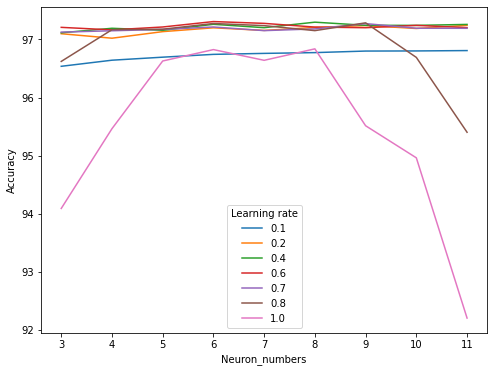

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in model_summary.groupby('learning_rate'):
    ax.plot(df['neuron_numbers'], df['test_accuracy'], label=np.round(label, 1))
    
ax.set_xlabel('Neuron_numbers')
ax.set_xticks(model_summary['neuron_numbers'].unique())
ax.set_ylabel('Accuracy')
plt.legend(title='Learning rate')
plt.show()

При увеличении числа нейронов качество падает и также learning rate большой ставить не стоит